In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Modélisation avec regression logistique**

# 1. Introduction:

### 🤖 Analyse de Sentiment avec Régression Logistique

#### Projet de machine learning pour la Classification des Sentiments

#### Objectif du Notebook
Ce notebook présente une approche complète de classification des sentiments utilisant la régression logistique sur un jeu de données de commentaires.

**Étapes Principales :**
- Préparation et nettoyage des données
- Encodage des labels
- Vectorisation des textes avec TF-IDF
- Optimisation des hyperparamètres avec GridSearchCV
- Entraînement du modèle
- Évaluation des performances
- Sauvegarde du modèle et des transformations

# 2. Importation des bibliothèques nécessaires

## 📚 Configuration de l'Environnement de Travail

### Importation des Bibliothèques Essentielles
- **Traitement de Données** : Pandas
- **Machine Learning** : Scikit-Learn
- **Prétraitement** : TF-IDF Vectorizer
- **Modélisation** : Régression Logistique

### Objectifs de l'Étape
- Préparer les outils nécessaires à l'analyse
- Importer les bibliothèques spécialisées
- Configurer l'environnement de modélisation

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 3. Chargement des Données

## 💾 Exploration et Préparation du Jeu de Données

### Source des Données
- **Fichier Source** : balanced_subset.csv
- **Contenu** : Commentaires de restaurants avec annotations de sentiment

### Étapes de Préparation
- Chargement du jeu de données complet
- Échantillonnage stratifié
- Vérification de l'équilibre des classes

### Analyse Préliminaire
- Taille du dataset
- Distribution des sentiments
- Aperçu des données brutes

3.1 Charger le jeu de données

In [ ]:
# Charger le fichier CSV contenant les colonnes 'rating' et 'cleaned_text'
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/balanced_subset.csv', encoding='utf-8')

df_subset = df.sample(n=400000, random_state=42)

# Vérification des données chargées
print(df_subset.head())

# Vérification de la taille du dataset
print(f"Taille du dataset : {df_subset.shape}")

          rating                                       cleaned_text
913868  Positive  situate right main street manayunk luckys last...
695928   Neutral  go th anniversary groupon present service know...
211072  Negative  ive sit hr half wait food come buddy gift card...
324554   Neutral  mean check place go one magazine street love o...
136857  Negative  shop time get cute outfit happy one bra bottom...
Taille du dataset : (400000, 2)


3.2 Vérifier l'équilibre des classes

In [ ]:
group_counts = df_subset['rating'].value_counts()
print(group_counts)

rating
Positive    163273
Negative    163009
Neutral      73718
Name: count, dtype: int64


# 4. Encodage des Labels


## 🏷️ Transformation des Labels de Sentiment

### Processus de Codage
- Conversion des labels textuels en valeurs numériques
- Utilisation de LabelEncoder

### Mapping des Sentiments
- Négatif → Valeur numérique
- Neutre → Valeur numérique
- Positif → Valeur numérique

### Objectifs
- Préparer les données pour l'apprentissage automatique
- Standardiser la représentation des sentiments

In [ ]:
# Encodage des labels 'rating' en valeurs numériques
label_encoder = LabelEncoder()
df_subset['rating_encoded'] = label_encoder.fit_transform(df_subset['rating'])

# Vérification des classes encodées
print(f"Classes encodées : {label_encoder.classes_}")

Classes encodées : ['Negative' 'Neutral' 'Positive']


# 5. Vectorisation des Textes avec TF-IDF


## 📊 Transformation Vectorielle des Commentaires

### Technique de Vectorisation
- **Méthode** : TF-IDF (Term Frequency-Inverse Document Frequency)
- Conversion des textes en représentation numérique

### Paramètres de Vectorisation
- Gestion des mots-vides
- Limitation du vocabulaire à 10 000 mots les plus fréquents
- Normalisation des vecteurs

### Objectifs
- Transformer le texte brut en features exploitables
- Réduire la dimensionnalité
- Préparer les données pour la classification

5.1 Avoir le nombre maximal des mots unique


In [ ]:
vectorizer = TfidfVectorizer(max_features=None)
vectorizer.fit(df_subset['cleaned_text'])
print(f"Taille du vocabulaire : {len(vectorizer.get_feature_names_out())}")

Taille du vocabulaire : 229473


5.2 Conversion des textes en vecteurs numériques

In [ ]:
# Initialisation du TfidfVectorizer
# max_features=10000 limite le vocabulaire à 10000 mots les plus fréquents
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Vectorisation des textes
X_tfidf = tfidf_vectorizer.fit_transform(df_subset['cleaned_text'])

# Séparation des features (X) et des labels (y)
X = X_tfidf
y = df_subset['rating_encoded']

# Vérification de la forme des données vectorisées
print(f"Forme des données vectorisées : {X.shape}")

Forme des données vectorisées : (400000, 10000)


# 6. Division des Données en Ensemble d'Entraînement et de Test


## 🔀 Division des Données d'Apprentissage

### Stratégie de Séparation
- **Ratio** : 80% Entraînement, 20% Test
- Stratification pour préserver la distribution des classes

### Méthode
- Utilisation de train_test_split
- Séparation des features (X) et des labels (y)

### Objectifs
- Prévenir le surapprentissage
- Permettre une évaluation indépendante
- Garantir la généralisation du modèle

In [ ]:
# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (320000, 10000)
Taille de l'ensemble de test : (80000, 10000)


# 7. Optimisation des hyperparamètres avec GridSearchCV

## 🔬 Optimisation des Paramètres du Modèle

### Technique de Recherche
- **Méthode** : GridSearchCV
- Exploration exhaustive des configurations

### Hyperparamètres Évalués
- Types de régularisation (l1, l2, elasticnet)
- Force de régularisation (C)
- Stratégies d'optimisation (solver)

### Approche
- Sélection du meilleur modèle
- Minimisation du risque de surapprentissage

In [ ]:
# Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = [
    # Combinaisons pour lbfgs et sag (l2 ou None)
    {
        'penalty': ['l2', None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'sag']
    },
    # Combinaisons pour saga (l1, l2)
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
    },
    # Combinaisons pour saga (elasticnet)
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.5]
    }
]

# Initialisation de GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Entraînement de GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Prédictions avec le modèle optimal
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

# Précision avec le meilleur modèle
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Précision avec le meilleur modèle : {accuracy_best:.2f}")

# Rapport de classification avec le meilleur modèle
print("Rapport de classification avec le meilleur modèle:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

# Matrice de confusion avec le meilleur modèle
print("Matrice de confusion avec le meilleur modèle:")
print(confusion_matrix(y_test, y_pred_best))


Meilleurs hyperparamètres : {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Précision avec le meilleur modèle : 0.81
Rapport de classification avec le meilleur modèle:
              precision    recall  f1-score   support

    Negative       0.84      0.89      0.87     32454
     Neutral       0.60      0.46      0.52     14794
    Positive       0.86      0.90      0.88     32752

    accuracy                           0.81     80000
   macro avg       0.77      0.75      0.76     80000
weighted avg       0.80      0.81      0.81     80000

Matrice de confusion avec le meilleur modèle:
[[28929  2393  1132]
 [ 4203  6796  3795]
 [ 1197  2082 29473]]


- Capture d'écran pour illustrer la durée nécessaire à la recherche des meilleurs hyperparamètres

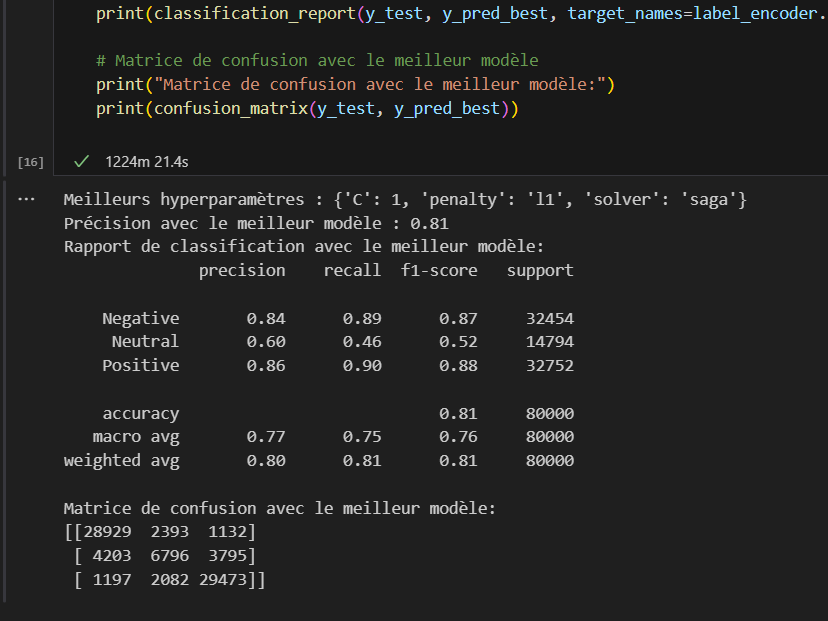

# 8. Entraînement du Modèle


## 🤖 Construction du Modèle de Classification

### Algorithme
- Régression Logistique
- Classification multi-classes

### Processus d'Apprentissage
- Ajustement sur les données d'entraînement
- Minimisation de la fonction de coût
- Estimation des probabilités de classe

### Objectifs
- Modélisation prédictive des sentiments
- Généralisation des patterns appris

In [ ]:
# Récupérer les meilleurs hyperparamètres trouvés par GridSearchCV
best_params = grid_search.best_params_

# Initialiser le modèle avec les meilleurs hyperparamètres
best_logreg = LogisticRegression(
    penalty=best_params['penalty'],
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=1000,
    random_state=42
)

# Si la pénalité est 'elasticnet', ajouter le paramètre l1_ratio
if best_params['penalty'] == 'elasticnet':
    best_logreg.set_params(l1_ratio=best_params.get('l1_ratio', 0.5))


# Préparation des features et des labels
X = tfidf_vectorizer.transform(df['cleaned_text'])
y = label_encoder.transform(df['rating'])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.2,random_state=42,
    stratify=y  # Conserver la distribution des classes
)

# Entraînement du modèle avec les meilleurs hyperparamètres sur l'ensemble des données
best_logreg.fit(X_train, y_train)

print("Modèle entraîné avec succès.")

Modèle entraîné avec succès.


# 9. Évaluation du modèle

## 📈 Analyse des Performances du Modèle

### Métriques d'Évaluation
- Accuracy globale
- Matrice de confusion
- Rapport de classification détaillé

### Indicateurs Clés
- Précision par classe
- Rappel
- Score F1

### Interprétation
- Forces du modèle
- Limitations identifiées
- Potentiel d'amélioration

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = best_logreg.predict(X_test)

# Calcul de la précision
accuracy_best = accuracy_score(y_test, y_pred)
print(f"Précision avec le meilleur modèle : {accuracy_best:.2f}")

# Rapport de classification
print("Rapport de classification avec le meilleur modèle:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matrice de confusion
print("Matrice de confusion avec le meilleur modèle:")
print(confusion_matrix(y_test, y_pred))

print("\n\n")

# Validation croisée (cross-validation)
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Scores de validation croisée (accuracy): {cv_scores}")
print(f"Précision moyenne de la validation croisée: {cv_scores.mean():.2f}")

Précision avec le meilleur modèle : 0.82
Rapport de classification avec le meilleur modèle:
              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87    129997
     Neutral       0.60      0.46      0.52     58500
    Positive       0.86      0.90      0.88    130000

    accuracy                           0.82    318497
   macro avg       0.77      0.75      0.76    318497
weighted avg       0.81      0.82      0.81    318497

Matrice de confusion avec le meilleur modèle:
[[116071   9714   4212]
 [ 16723  27171  14606]
 [  4278   8198 117524]]



Scores de validation croisée (accuracy): [0.8164703  0.81794919 0.81737226 0.81907558 0.81646566]
Précision moyenne de la validation croisée: 0.82


- Un petit test:

In [ ]:
# Vérification des prédictions sur quelques exemples
sample_texts = ["The food was amazing!", "Terrible service, never coming back.", "It was okay."]
sample_tfidf = tfidf_vectorizer.transform(sample_texts)
sample_predictions = best_logreg.predict(sample_tfidf)
sample_predictions_labels = label_encoder.inverse_transform(sample_predictions)

for text, label in zip(sample_texts, sample_predictions_labels):
    print(f"Texte: {text} -> Prédiction: {label}")

Texte: The food was amazing! -> Prédiction: Positive
Texte: Terrible service, never coming back. -> Prédiction: Negative
Texte: It was okay. -> Prédiction: Neutral


# 10. Sauvegarde du modèle et des transformations

## 💾 Persistance des Composants Algorithmiques

### Éléments Sauvegardés
- Modèle de Régression Logistique
- Vectoriseur TF-IDF
- Encodeur de Labels

### Objectifs
- Réutilisation future
- Déploiement dans des applications
- Reproductibilité de l'analyse

In [ ]:

# Sauvegarder le modèle entraîné avec les meilleurs hyperparamètres
joblib.dump(best_logreg, '/content/drive/MyDrive/Machine Learning/Logistic Regression/logreg_model.pkl')

# Sauvegarde du vectorizer
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/Machine Learning/Logistic Regression/tfidf_vectorizer.pkl')

# Sauvegarde du label encoder
joblib.dump(label_encoder, '/content/drive/MyDrive/Machine Learning/Logistic Regression/label_encoder.pkl')

['label_encoder.pkl']

# 11. Chargement du modèle sauvegardé et un exemple de prédiction

## Chargement des Composants Sauvegardés

### Étapes
- Chargement du modèle entraîné
- Chargement du vectoriseur TF-IDF
- Chargement du label encoder

In [4]:
# Chargement du modèle entraîné
loaded_model = joblib.load('/content/drive/MyDrive/Machine Learning/Logistic Regression/logreg_model.pkl')

# Chargement du vectorizer
loaded_vectorizer = joblib.load('/content/drive/MyDrive/Machine Learning/Logistic Regression/tfidf_vectorizer.pkl')

# Chargement du label encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/Machine Learning/Logistic Regression/label_encoder.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.2 when using version 1.5.2. This might lead to breaking c

- Exemple de Prédiction

In [7]:
# Exemple de texte pour la prédiction
example_text = ["best food"]

# Vectorisation du texte
example_tfidf = loaded_vectorizer.transform(example_text)

# Prédiction
predicted_rating = loaded_model.predict(example_tfidf)

# Décodage de la prédiction
predicted_rating_label = loaded_label_encoder.inverse_transform(predicted_rating)

print(f"Prédiction: {predicted_rating_label[0]}")

Prédiction: Positive


# 12. Conclusion:

## 🚀 Bilan et Perspectives

### Réalisations
- Modèle de classification de sentiments
- Insights sur l'analyse textuelle

### Perspectives d'Amélioration
- Enrichissement du jeu de données
- Exploration d'algorithmes avancés
- Raffinement des techniques de prétraitement

### Applications Potentielles
- Analyse de feedback client
- Systèmes de recommandation
- Veille stratégique